In [1]:
import pandas, numpy

import scipy, scipy.stats

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(12, 8)})

# 0. user-defined variables

In [2]:
data_file ='/Users/adrian/gd15/hi/research/huvec/data/fluxes_targeted/csv/13C_OSK_EC45_Extracellular.csv'

# 1. read data

In [3]:
df = pandas.read_csv(data_file)
df.head()
df.dtypes

Sample ID          object
Sample ID Rosa    float64
Experiment         object
13label            object
Treatment         float64
Timepoint (h)       int64
Cell numbers      float64
Lactate           float64
Glucose           float64
Glutamate         float64
dtype: object

In [4]:
#pandas.set_option("display.max_rows", 200, "display.max_columns", 20)
#print(df)

# 3. plot

findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


Lactate
correlations
[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0754, 0.0591, 0.0668, 0.0686, 0.0784, 0.0634, 0.0809, 0.0696, 0.0735]
Spearman 0.47434164902525694 0.19702207215775042
Pearson 0.4622652303994908 0.210270512978017
linear regression 0.46226523039949063 0.21027051297801727

[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.1357, 0.1342, 0.1256, 0.133, 0.1409, 0.1333, 0.136, 0.1348, 0.1404]
Spearman 0.47434164902525694 0.19702207215775042
Pearson 0.5047387923825513 0.16580506251785704
linear regression 0.504738792382551 0.1658050625178573
boxplots
filtered [array([0.0754, 0.0591, 0.0668]), array([0.0686, 0.0784, 0.0634]), array([0.0809, 0.0696, 0.0735]), array([0.1357, 0.1342, 0.1256]), array([0.133 , 0.1409, 0.1333]), array([0.136 , 0.1348, 0.1404])]
[0.0754 0.0591 0.0668] [0.0686 0.0784 0.0634] 3.0 0.7
[0.0754 0.0591 0.0668] [0.0809 0.0696 0.0735] 2.0 0.4
[0.1357 0.1342 0.1256] [0.133  0.1409 0.1333] 4.0 1.0
[0.1357 0.1342 0.1256] [0.136  0.1348 0.1404] 1.0 0.2


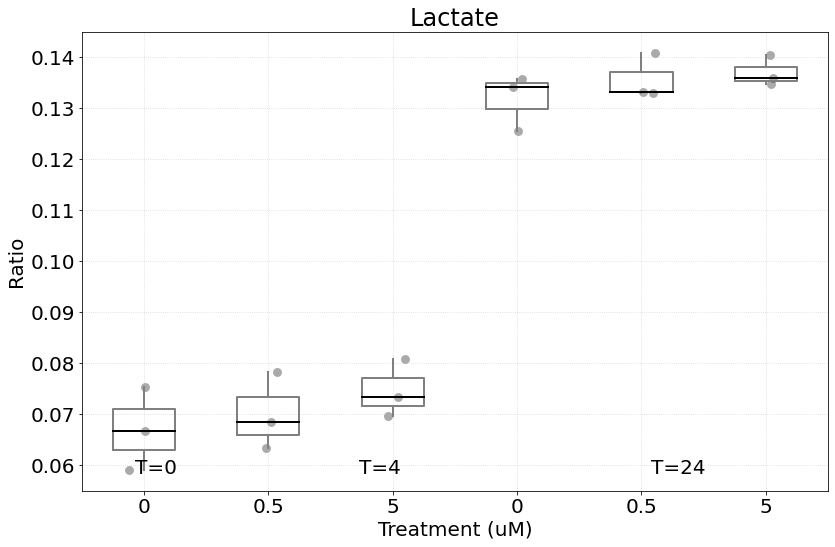

In [5]:
for metab in df.columns[7:8]:
    
    print(metab)
    
    loc_zero_egm = df[(df['Treatment'] == 0) & (df['Timepoint (h)'] == 0) & (df['13label'] == 'egm')][metab].values
    loc_zero_zero = df[(df['Treatment'] == 0) & (df['Timepoint (h)'] == 0) & (df['13label'] == '1,2-13C Glucose')][metab].values
    
    loc_four_egm = df[(df['Treatment'] == 0) & (df['Timepoint (h)'] == 4) & (df['13label'] == 'egm')][metab].values
    loc_four_zero = df[(df['Treatment'] == 0) & (df['Timepoint (h)'] == 4) & (df['13label'] == '1,2-13C Glucose')][metab].values
    loc_four_half = df[(df['Treatment'] == 0.5) & (df['Timepoint (h)'] == 4)][metab].values
    loc_four_five = df[(df['Treatment'] == 5) & (df['Timepoint (h)'] == 4)][metab].values

    loc_twentyfour_egm = df[(df['Treatment'] == 0) & (df['Timepoint (h)'] == 24) & (df['13label'] == 'egm')][metab].values
    loc_twentyfour_zero = df[(df['Treatment'] == 0) & (df['Timepoint (h)'] == 24) & (df['13label'] == '1,2-13C Glucose')][metab].values
    loc_twentyfour_half = df[(df['Treatment'] == 0.5) & (df['Timepoint (h)'] == 24)][metab].values
    loc_twentyfour_five = df[(df['Treatment'] == 5) & (df['Timepoint (h)'] == 24)][metab].values
    
    quant = [
        
        loc_four_zero, loc_four_half, loc_four_five, 
             
        loc_twentyfour_zero, loc_twentyfour_half, loc_twentyfour_five]
    
    ###
    ### correlations
    ###
    print('correlations')
    
    x = []; y = []
    for element in loc_four_zero:
        if ~numpy.isnan(element):
            x.append(1); y.append(element)
        
    for element in loc_four_half:
        if ~numpy.isnan(element):
            x.append(2); y.append(element)
        
    for element in loc_four_five:
        if ~numpy.isnan(element):
            x.append(3); y.append(element)
        
    print(x)
    print(y)
    correlation, pvalue = scipy.stats.spearmanr(x, y)
    print('Spearman', correlation, pvalue)
    
    correlation, pvalue = scipy.stats.pearsonr(x, y)
    print('Pearson', correlation, pvalue)
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    print('linear regression', r_value, p_value)
    line = (slope * numpy.array(x)) + intercept
    
    if p_value < 0.05:
        matplotlib.pyplot.plot(x, y, 'ok', alpha=1/3, ms=20, mew=0)
        matplotlib.pyplot.plot(x, line, '-', lw=4, color='blue')
        matplotlib.pyplot.xlim([0.5, 3.5])
        matplotlib.pyplot.xticks([1, 2, 3], ['0', '0.5', '5'])
        matplotlib.pyplot.xlabel('Concentration (uM)')
        matplotlib.pyplot.ylabel('Ratio')
        matplotlib.pyplot.title('{} at 4 h'.format(metab))
        matplotlib.pyplot.grid(ls=':')
        matplotlib.pyplot.tight_layout()
        matplotlib.pyplot.show()
        
    print()
    
    x = []; y = []
    for element in loc_twentyfour_zero:
        if ~numpy.isnan(element):
            x.append(1); y.append(element)
        
    for element in loc_twentyfour_half:
        if ~numpy.isnan(element):
            x.append(2); y.append(element)
        
    for element in loc_twentyfour_five:
        if ~numpy.isnan(element):
            x.append(3); y.append(element)
        
    print(x)
    print(y)
    correlation, pvalue = scipy.stats.spearmanr(x, y)
    print('Spearman', correlation, pvalue)
    
    correlation, pvalue = scipy.stats.pearsonr(x, y)
    print('Pearson', correlation, pvalue)
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    print('linear regression', r_value, p_value)
    line = (slope * numpy.array(x)) + intercept
    
    if p_value < 0.05:
        matplotlib.pyplot.plot(x, y, 'ok', alpha=1/3, ms=20, mew=0)
        matplotlib.pyplot.plot(x, line, '-', lw=4, color='red')
        matplotlib.pyplot.xlim([0.5, 3.5])
        matplotlib.pyplot.xticks([1, 2, 3], ['0', '0.5', '5'])
        matplotlib.pyplot.xlabel('Concentration (uM)')
        matplotlib.pyplot.ylabel('Ratio')
        matplotlib.pyplot.title('{} at 24 h'.format(metab))
        matplotlib.pyplot.grid(ls=':')
        matplotlib.pyplot.tight_layout()
        matplotlib.pyplot.show()
        
    ###
    ### boxplots
    ###
    print('boxplots')
    
    f = matplotlib.pyplot.figure()
    ax = f.add_subplot(111)
    
    filtered = [element[~numpy.isnan(element)] for element in quant]
        
    matplotlib.pyplot.boxplot(filtered, showcaps=False, medianprops=dict(linewidth=2, color='black'), boxprops=dict(linewidth=2, color='gray'), whiskerprops=dict(linewidth=2, color='gray'))
    print('filtered', filtered)
    
    ###
    ### scatter plots
    ###
    x=[]; y=[]
    for i in range(len(quant)):
        for j in range(len(quant[i])):
            
            shift = 0.25
            r=-shift/2 + shift*numpy.random.random()
            x.append(i+1+r)
            
            y.append(quant[i][j])
            
    matplotlib.pyplot.scatter(x, y, s=80, c='black', alpha=1/3, linewidths=0)
    
    ###
    ### statistics
    ###
    reference = filtered[0]
    for pos in [1, 2]:
        stat, pvalue = scipy.stats.mannwhitneyu(reference, filtered[pos])
        print(reference, filtered[pos], stat, pvalue)
        if 0.01 < pvalue < 0.05:
            print(pos, 'significant', numpy.mean(reference), numpy.mean(filtered[pos]), pvalue)
            matplotlib.pyplot.text(pos/5.75, 0.85, '*', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)
        if pvalue < 0.01:
            print(pos, 'very significant', numpy.mean(reference), numpy.mean(filtered[pos]), pvalue)
            matplotlib.pyplot.text(pos/5.5, 0.85, '**', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)
    
    reference = filtered[3]
    for pos in [4, 5]:
        stat, pvalue = scipy.stats.mannwhitneyu(reference, filtered[pos])
        print(reference, filtered[pos], stat, pvalue)
        if 0.01 < pvalue < 0.05:
            print(pos, 'significant', numpy.mean(reference), numpy.mean(filtered[pos]), pvalue)
            matplotlib.pyplot.text(pos/6.5, 0.85, '*', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)
        if pvalue < 0.01:
            print(pos, 'very significant', numpy.mean(reference), numpy.mean(filtered[pos]), pvalue)
            matplotlib.pyplot.text(pos/6, 0.85, '**', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)
                        
    ###
    ### close figure
    ###
        
    matplotlib.pyplot.text(0.1, 0.05, 'T=0', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center')
    matplotlib.pyplot.text(0.4, 0.05, 'T=4', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center')
    matplotlib.pyplot.text(0.8, 0.05, 'T=24', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center')
    
    matplotlib.pyplot.xlabel('Treatment (uM)')
    matplotlib.pyplot.ylabel('Ratio')
    matplotlib.pyplot.xticks([1, 2, 3, 4, 5, 6], ['0', '0.5', '5', '0', '0.5', '5'])
    matplotlib.pyplot.title(metab)
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.grid(ls=':', alpha=0.5)
    
    #matplotlib.pyplot.show()
    
    matplotlib.pyplot.savefig('lactate.svg')